In [1]:
from platform import python_version
print("Python version used for this analysis is: ", python_version())

Python version used for this analysis is:  3.7.13


In [2]:
# LOADING PYTHON LIBRARIES NEEDED FOR THE ANALYSIS
import sys    # System Functions
import os     # View OS File Info

#Scikit-learn for predictive analysis 
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import re
import tensorflow as tf
import keras

import tensorflow as ft        # tensorFlow Package
from tensorflow import keras  # Neural network API
from keras import preprocessing

from tensorflow.keras.preprocessing.text import Tokenizer # Convert input text to tokens.
from tensorflow.keras.callbacks import EarlyStopping      # Stop training at a threshold.
from tensorflow.keras.models import load_model            # To load a saved model.
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences # For padding of text.


In [3]:
import pandas as pd              # For Dataframe and data manipulations
import numpy as np               # Provides array objects for calculations
import gzip        # For unzipping the input customer review files
import re
import seaborn as sns              # For visualization like data distribution matrix
import nltk                        # Natural Language toolkit
import re                          # For regular expression usage

from nltk.corpus import stopwords # For stopword usage
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download ('stopwords')
nltk.download ('punkt')
nltk.download ('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jasonewillis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jasonewillis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jasonewillis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# Shows matplotlib output inline in the jupyter notebook
import matplotlib.pyplot as plt
%matplotlib inline
sns.color_palette("vlag", as_cmap=True);

In [5]:
# Verify Input File Locations
print(os.listdir(path='./Data/sentiment_labelled_sentences/'))
# Output: ['.DS_Store', 'combo.txt', 'amazon_cells_labelled.txt', 'readme.txt', 'yelp_labelled.txt', 'imdb_labelled.txt']

['combo.txt', 'amazon_cells_labelled.txt', 'readme.txt', '.ipynb_checkpoints', 'yelp_labelled.txt', 'imdb_labelled.txt']


---
### Load Data From UCI *.txt Files to DFs
---

In [6]:
# load data file
df_amz = pd.read_csv('./Data/sentiment_labelled_sentences/amazon_cells_labelled.txt', delimiter='\t', header=None)
df_amz.columns = ['review', 'sentiment']

df_imdb = pd.read_csv('./Data/sentiment_labelled_sentences/imdb_labelled.txt', delimiter='\t', header=None)
df_imdb.columns = ['review', 'sentiment']

df_yelp = pd.read_csv('./Data/sentiment_labelled_sentences/yelp_labelled.txt', delimiter='\t', header=None)
df_yelp.columns = ['review', 'sentiment']

In [7]:
# Concatinate and Read in Combo File to DF

df_concat = pd.concat([df_amz, df_imdb, df_yelp], axis=0)
df = df_concat.copy()
df.reset_index(drop=True, col_fill=True, inplace=True)
#df.info()
df.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [8]:
#View Shape of the data (Data2.csv)
df.shape

(2748, 2)

In [9]:
df.describe()

,sentiment
count,2748.000000
mean,0.504367
std,0.500072
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [10]:
# Check for special characters.The review text contains punctuation and special characters like ;)/()!-#
pd.set_option('display.max_colwidth', 5000)
df.head(10)

,review,sentiment
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up right to get decent volume.,0
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


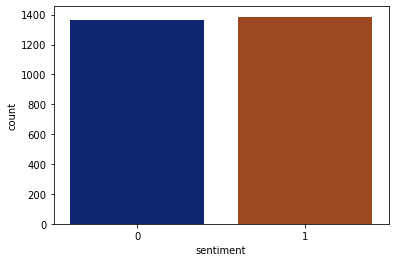

In [11]:
# Verify the distribution of the data. 
sns.countplot(data=df, x='sentiment', palette="dark")

## Data Cleaning

In [12]:
# Convert ratings to Integer
df['sentiment'] = df['sentiment'].astype(int)

# Take only 2 needed columns if your dataset has many columns and you needed just two.
df = df[['review', 'sentiment']]

In [13]:
# Drop any null columns
df = df.dropna()

In [14]:
# Convert any non string values to string values.
for i in range (0, len(df)-1):
    if type(df.iloc[i] ['review'])!= str:
        df.iloc[i] ['review'] = str(df.iloc[i] ['review'])

In [15]:
# Remove any rating with neutral rating, we need only negative and positive reviews.
#df = df[df['sentiment'] != 3]

In [16]:
# Convert ratings 1 and 2 to 0 which is a negative review
# Convert ratings 4 and 5 to 1 which is a positive review
def label(i):
    return 1 if i >= 4 else 0
df['label'] = df['sentiment'].apply(label)
df.head(10)


,review,sentiment,label
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0,0
1,"Good case, Excellent value.",1,0
2,Great for the jawbone.,1,0
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0,0
4,The mic is great.,1,0
5,I have to jiggle the plug to get it to line up right to get decent volume.,0,0
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",0,0
7,If you are Razr owner...you must have this!,1,0
8,"Needless to say, I wasted my money.",0,0
9,What a waste of money and time!.,0,0


In [17]:
#Rename the columns
#df.rename(columns = {"rating": "overall"}, inplace=True) Do this if applicable but I'm not doing here.

# Drop the column named rating
#df.drop(['sentiment'],axis=1)
df = df.drop(['sentiment'],axis=1)
df.head()

,review,label
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",0
2,Great for the jawbone.,0
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,0


In [18]:
review_df = df
review_df.shape

(2748, 2)

In [19]:
# Balancing the Positive and Negative reviews
# positive_df = review_df[review_df['label'] == 1].sample(n=len(review_df[review_df['label'] == 0]), random_state=15)
# negative_df = review_df[review_df['label'] == 0]
# print(positive_df.shape , negative_df.shape)

In [20]:
# # Combine the reviews
# review_df = positive_df.append(negative_df).reset_index(drop=True)

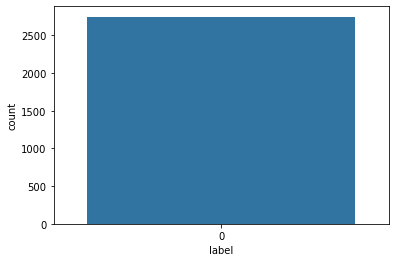

In [21]:
# Verify the distribution of the data again.
sns.countplot(x="label",data=review_df);

In [22]:
# Identify vocabulary size
tokenizer = Tokenizer()
tokenizer.fit_on_texts(review_df['review'])
print("Vocabulary size: ", len(tokenizer.word_index) + 1)

Vocabulary size:  5272


In [23]:
# DATA PROCESSING
# Removes punctuations and special characters
# Makes the text into lowercase
# Performs tokenization
# Performs lemmatization
# Removes stopwords

In [24]:
description_list = []
stop_words = stopwords.words('english')
for description in review_df.review:
    #Regular Expression, removes punctuations and special characters.
    description = re.sub("[^a-zA-Z]", " ", description)
    
    #Convert to lower case
    description = description.lower()
    
    #Perform tokenization
    description=nltk.word_tokenize(description)
    
    #Perform lemmatization to bring the words to its root or join the inflected words.
    lemma = nltk.WordNetLemmatizer()
    description = [lemma.lemmatize(word) for word in description]
    
    #Removing stopwords
    description = [word for word in description if not word in stop_words]
    description = " ".join(description)
    description_list.append(description)

In [25]:
# Display top 5 reviews after they are preprocessed
description_list[0:5]

['way plug u unless go converter',
 'good case excellent value',
 'great jawbone',
 'tied charger conversation lasting minute major problem',
 'mic great']

In [26]:
# Print the Stopwords that were applied. Stopwords in Python do not add much meaning to a sentence, can be ignored.
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [27]:
# Splitting the data into training and test set.
X = np.array(description_list)
y = review_df.label.values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 15, stratify = y)

y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

# View the training and testing sample sizes
print("Training size: ", X_train.shape)
print("Testing size: ", X_test.shape)


Training size:  (2198,)
Testing size:  (550,)


In [28]:
# Convert the labels to one-hot-encoding
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes =2)

In [29]:
# Define the variables that will be used to override the defaults
vocab_size = 15000
oov_tok = "<oov>"
embedding_dim = 16
max_length = 50
trunc_type= 'post'
padding_type='post'

In [30]:
# Perform Tokenization
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

print(word_index) #Commenting to avoid printing the entire dictionary which makes the PDF large.


{'<oov>': 1, 'wa': 2, 'movie': 3, 'good': 4, 'great': 5, 'phone': 6, 'film': 7, 'one': 8, 'time': 9, 'like': 10, 'food': 11, 'place': 12, 'service': 13, 'work': 14, 'really': 15, 'bad': 16, 'well': 17, 'would': 18, 'ha': 19, 'even': 20, 'best': 21, 'also': 22, 'ever': 23, 'go': 24, 'back': 25, 'get': 26, 'make': 27, 'quality': 28, 'love': 29, 'product': 30, 'headset': 31, 'character': 32, 'made': 33, 'could': 34, 'never': 35, 'thing': 36, 'battery': 37, 'much': 38, 'nice': 39, 'better': 40, 'way': 41, 'recommend': 42, 'excellent': 43, 'sound': 44, 'pretty': 45, 'acting': 46, 'see': 47, 'first': 48, 'think': 49, 'everything': 50, 'say': 51, 'got': 52, 'use': 53, 'look': 54, 'worst': 55, 'still': 56, 'price': 57, 'amazing': 58, 'minute': 59, 'doe': 60, 'enough': 61, 'every': 62, 'little': 63, 'terrible': 64, 'disappointed': 65, 'ear': 66, 'two': 67, 'right': 68, 'story': 69, 'definitely': 70, 'scene': 71, 'year': 72, 'lot': 73, 'friendly': 74, 'case': 75, 'star': 76, 'waste': 77, 'know':

In [31]:
# Apply padding to training data
sequences_train = tokenizer.texts_to_sequences(X_train)
padded_train = pad_sequences(sequences_train, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Apply padding to testing data
sequences_test = tokenizer.texts_to_sequences(X_test)
padded_test = pad_sequences(sequences_test, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [32]:
# Display the padded sequence
np.set_printoptions(threshold=sys.maxsize)
padded_train[1]

array([  6, 335, 289,  10,   2,  90,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [33]:
# Convert padded data to numpy array to be used in model.
training_padded = np.array(padded_train)
training_label = np.array(y_train)
test_padded = np.array(padded_test)
test_label = np.array(y_test)

In [34]:
# Export the data to csv file
# pd.DataFrame(training_padded).to_csv("training_padded.csv")
# pd.DataFrame(training_label).to_csv("training_label.csv")
# pd.DataFrame(test_padded).to_csv("test_padded.csv")
# pd.DataFrame(test_label).to_csv("test_label.csv")

### Part III:  Network Architecture¶


In [35]:
# SENTIMENT ANALYSIS

# Build a neural network to perform sentiment analysis.
activation = 'softmax'
loss = 'categorical_crossentropy'
optimizer = 'adam' #rmsprop
num_epochs = 20

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(2, activation=activation)
])

model.compile(loss=loss,optimizer=optimizer,metrics=['accuracy'])
model.summary()
history = model.fit(training_padded, training_label, batch_size=32 ,epochs=num_epochs, validation_split = 0.3, callbacks=[early_stopping_monitor], verbose=True)

2022-08-23 19:01:47.096608: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            240000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 100)               1700      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
Total params: 246,852
Trainable params: 246,852
Non-trainable params: 0
__________________________________________________

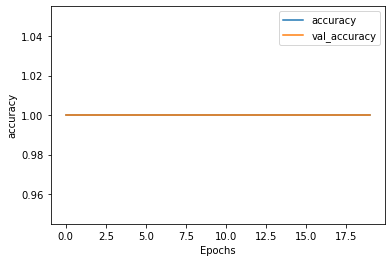

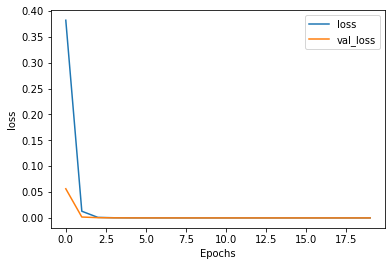

In [36]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [37]:
# Verify model accuracy on test data (data not seen by the model earlier)
score = model.evaluate(test_padded, test_label, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 3.960656158596976e-06 / Test accuracy: 1.0


In [38]:
# Saving and reloading the model to perform predictions
#SAVE THE MODEL

model.save('SentimentAnalysisModel.h5')

# Load the model for performing predictions
my_model = load_model('SentimentAnalysisModel.h5') #// A .h5 is a hierarchical data format (HDF)


In [39]:
# PERFORM PREDICTIONS
# Perform predictions on the model
 
predictions = my_model.predict(test_padded)

# Verify the predicted sentiment by comparing to actual label from test data
i = 9   #Take any text from test data to verify.

print("Predicted review text:" , X_test[i], "\n")
print("Predicted:", "Negative" if predictions[i][0] >= 0.5 else "Positive" , "review")
print("Actual: ", "Negative" if y_test[i][1] == 0 else "Positive" , "review")

Predicted review text: wa left shattered experience watching film took good two hour fully recover 

Predicted: Negative review
Actual:  Negative review
